In [262]:
import openmc
import matplotlib.pyplot as plt

path = '/root/jeff-3.3-hdf5/cross_sections.xml'

In [263]:
#------ Materials -------#

# fuel: enriched uranium dioxide

uo2 = openmc.Material(1,'uo2_high',temperature=1200)
uo2.add_nuclide('U235', 0.0445)
uo2.add_nuclide('U238', 0.9555)
uo2.add_nuclide('O16', 2.0)
uo2.set_density('g/cm3', 10.4668)

# clad: Optimized ZIRLO 
clad = openmc.Material(5, 'ZIRLO',temperature=900)
clad.add_element('Zr', 1.0)
#clad.add_element('Sn', 0.01)
#clad.add_element('Nb', 0.007)
clad.set_density('g/cm3', 6.55) # according to Mohamad

# water
water = openmc.Material(6, 'h2o')
water.add_nuclide('H1', 2.0)
water.add_nuclide('O16', 1.0)
water.set_density('g/cm3', 0.75)
water.add_s_alpha_beta('c_H_in_H2O')

mats = openmc.Materials([uo2, clad, water])
mats.cross_sections = path
mats.export_to_xml()

In [264]:
n = 1

fuel_radius = 0.409595
ba_radius = 0.412155

clad_inner_radius = 0.417830 +0.015
clad_outer_radius = 0.474980

pitch = 1.12
pin_cell_box = openmc.model.RectangularPrism(width=pitch, height=pitch)

fuel_pin = openmc.ZCylinder(r=ba_radius)
clad_inner = openmc.ZCylinder(r=clad_inner_radius)
clad_outer = openmc.ZCylinder(r=clad_outer_radius)

fuel_region = -fuel_pin
air_region = +fuel_pin & -clad_inner
clad_region = +clad_inner & -clad_outer
coolant_region = +clad_outer & -pin_cell_box

fuel = uo2
coolant = water

fuel_cell = openmc.Cell(fill=fuel, region=fuel_region)
gap_cell = openmc.Cell(region=air_region)
clad_cell = openmc.Cell(fill=clad, region=clad_region)
coolant_cell = openmc.Cell(fill=coolant, region=coolant_region)

fuel_universe = openmc.Universe(cells=[fuel_cell, gap_cell, clad_cell, coolant_cell])

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

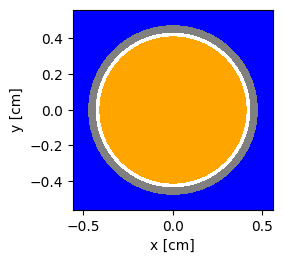

In [265]:
fuel_universe.plot(colors={fuel_cell:'orange', coolant_cell:'blue',clad_cell:'grey',gap_cell:'white'})

In [266]:
lattice = openmc.RectLattice()
lattice.pitch = (pitch,pitch)
lattice.lower_left = (-pitch, -pitch)  # Set lower-left corner of the lattice

In [267]:
lattice_shape = (n, n)
lattice_indices = [[fuel_universe for _ in range(lattice_shape[1])] for _ in range(lattice_shape[0])]

lattice.universes = [
    [fuel_universe]*n
    #[fuel_universe]*n,[fuel_universe]*n,[fuel_universe]*n,[fuel_universe]*n,[fuel_universe]*n,[fuel_universe]*n,[fuel_universe]*n,[fuel_universe]*n,[fuel_universe]*n,[fuel_universe]*n,[fuel_universe]*n,[fuel_universe]*n,[fuel_universe]*n,[fuel_universe]*n,[fuel_universe]*n,[fuel_universe]*n,[fuel_universe]*n
]

# Step 4: Create fuel assembly universe
assembly_cell = openmc.Cell(fill=lattice)
assembly_universe = openmc.Universe(cells=[assembly_cell])


# Step 5: Define boundaries and geometry
xmin = openmc.XPlane(x0=-pitch)
xmax = openmc.XPlane(x0=pitch*(n-1))
ymin = openmc.YPlane(y0=-pitch)
ymax = openmc.YPlane(y0=pitch*(n-1))

assembly_boundary = +xmin & -xmax & +ymin & -ymax

#outside of left and inside of right, outside of bottom, and inside of top and outside of clad outer cylinder
# Step 5: Define boundaries and geometry
xmin_mod = openmc.XPlane(x0=-pitch)
xmax = openmc.XPlane(x0=pitch*(n-1))
ymin = openmc.YPlane(y0=-pitch)
ymax = openmc.YPlane(y0=pitch*(n-1))

#geom_boundary = 
#water_region = +assembly_boundary & -geom_boundary

#moderator = openmc.Cell(5, 'moderator')
#moderator.fill = water
#moderator.region = water_region

root_cell = openmc.Cell(fill=assembly_universe, region=assembly_boundary)
root_universe = openmc.Universe(cells=[root_cell])

geometry = openmc.Geometry(root_universe)
geometry.root_universe = root_universe
geometry.export_to_xml()

SyntaxError: invalid syntax (1753637832.py, line 29)

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

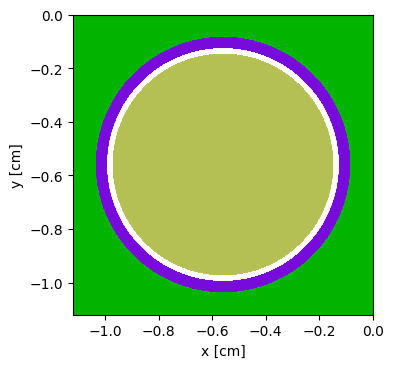

In [ ]:
root_universe.plot(pixels=[300,300])

In [ ]:
point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)

settings = openmc.Settings()
settings.source = src
settings.batches = 100
settings.inactive = 10
settings.particles = 1000
settings.export_to_xml()

/usr/local/lib/python3.9/dist-packages/openmc/source.py:390: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn("This class is deprecated in favor of 'IndependentSource'", FutureWarning)


In [ ]:
import os
os.system('rm *h5')
os.system('rm *png')

openmc.run()

rm: cannot remove '*png': No such file or directory


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

RuntimeError: Maximum number of lost particles has been reached. application called MPI_Abort(MPI_COMM_WORLD, -1) - process 0 [unset]: write_line error; fd=-1 buf=:cmd=abort exitcode=-1 : system msg for write_line failure : Bad file descriptor ERROR: Maximum number of lost particles has been reached. application called MPI_Abort(MPI_COMM_WORLD, -1) - process 0 [unset]: write_line error; fd=-1 buf=:cmd=abort exitcode=-1 : system msg for write_line failure : Bad file descriptor

In [ ]:
'''uo2_mid = openmc.Material(2,'uo2_mid')
uo2_mid.add_nuclide('U235', 0.034)
uo2_mid.add_nuclide('U238', 0.966)
uo2_mid.add_nuclide('O16', 2.0)
uo2_mid.set_density('g/cm3', 10.4668)

uo2_low = openmc.Material(3,'uo2_low')
uo2_low.add_nuclide('U235', 0.0245)
uo2_low.add_nuclide('U238', 0.9755)
uo2_low.add_nuclide('O16', 2.0)
uo2_low.set_density('g/cm3', 10.4668) # according to Mohamad

# burnable absorber: ZrB2
ba = openmc.Material(4, 'BA')
ba.add_element('Zr', 1.0)
ba.add_element('B', 2.0)
ba.set_density('g/cm3', 5.42) # according to Mohamad'''

"uo2_mid = openmc.Material(2,'uo2_mid')\nuo2_mid.add_nuclide('U235', 0.034)\nuo2_mid.add_nuclide('U238', 0.966)\nuo2_mid.add_nuclide('O16', 2.0)\nuo2_mid.set_density('g/cm3', 10.4668)\n\nuo2_low = openmc.Material(3,'uo2_low')\nuo2_low.add_nuclide('U235', 0.0245)\nuo2_low.add_nuclide('U238', 0.9755)\nuo2_low.add_nuclide('O16', 2.0)\nuo2_low.set_density('g/cm3', 10.4668) # according to Mohamad\n\n# burnable absorber: ZrB2\nba = openmc.Material(4, 'BA')\nba.add_element('Zr', 1.0)\nba.add_element('B', 2.0)\nba.set_density('g/cm3', 5.42) # according to Mohamad"